<a href="https://colab.research.google.com/github/springboardmentor789r/AgriYield/blob/Intern_LikhitaKoppuravuri/AiCropYield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df = pd.read_csv('crop_yield_dataset.csv')
print(df.head())


         Date Crop_Type Soil_Type  Soil_pH  Temperature   Humidity  \
0  2014-01-01     Wheat     Peaty     5.50     9.440599  80.000000   
1  2014-01-01      Corn     Loamy     6.50    20.052576  79.947424   
2  2014-01-01      Rice     Peaty     5.50    12.143099  80.000000   
3  2014-01-01    Barley     Sandy     6.75    19.751848  80.000000   
4  2014-01-01   Soybean     Peaty     5.50    16.110395  80.000000   

   Wind_Speed     N     P     K  Crop_Yield  Soil_Quality  
0   10.956707  60.5  45.0  31.5    0.000000     22.833333  
1    8.591577  84.0  66.0  50.0  104.871310     66.666667  
2    7.227751  71.5  54.0  38.5    0.000000     27.333333  
3    2.682683  50.0  40.0  30.0   58.939796     35.000000  
4    7.696070  49.5  45.0  38.5   32.970413     22.166667  


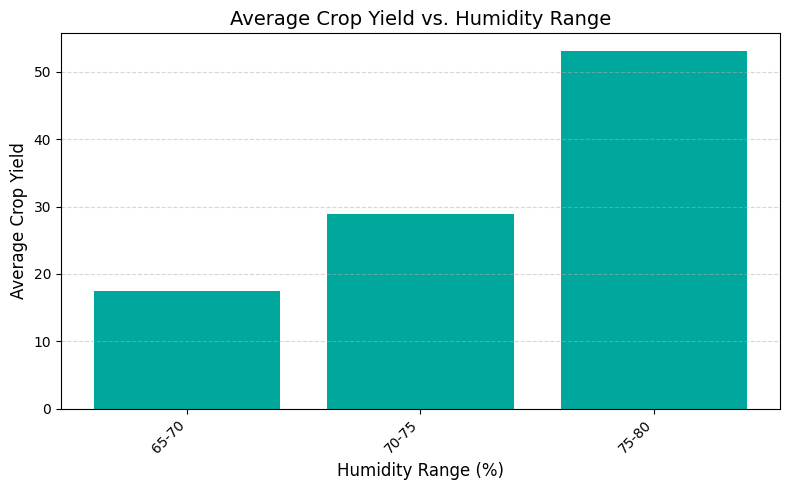


Average Yield by Humidity Range:
  Humidity_Group  Crop_Yield
0          65-70   17.415191
1          70-75   28.914460
2          75-80   53.089237


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("crop_yield_dataset.csv1.xlsm")
bins = [45, 50, 55, 60, 65, 70, 75, 80]
labels = ['45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80']
df['Humidity_Group'] = pd.cut(df['Humidity'], bins=bins, labels=labels, right=False, include_lowest=True)
humidity_yield_avg = df.groupby('Humidity_Group', observed=True)['Crop_Yield'].mean().dropna().reset_index()
plt.figure(figsize=(8, 5))
plt.bar(humidity_yield_avg['Humidity_Group'], humidity_yield_avg['Crop_Yield'], color='#00A79D')
plt.title('Average Crop Yield vs. Humidity Range', fontsize=14)
plt.xlabel('Humidity Range (%)', fontsize=12)
plt.ylabel('Average Crop Yield', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
print("\nAverage Yield by Humidity Range:")
print(humidity_yield_avg)


Data loaded successfully.


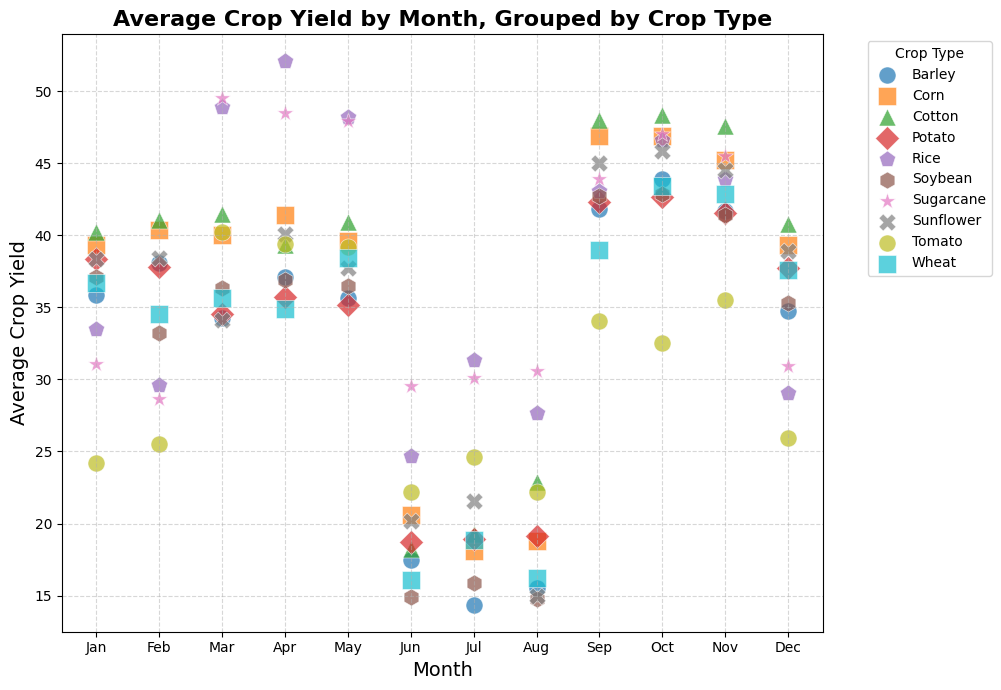


--- Summary Data (Average Yield by Crop Type and Month) ---
| Crop_Type   |   Month |   Crop_Yield |
|:------------|--------:|-------------:|
| Barley      |       1 |      35.8814 |
| Barley      |       2 |      38.0854 |
| Barley      |       3 |      34.2624 |
| Barley      |       4 |      37.0933 |
| Barley      |       5 |      35.652  |
| Barley      |       6 |      17.4988 |
| Barley      |       7 |      14.3756 |
| Barley      |       8 |      15.5557 |
| Barley      |       9 |      41.8293 |
| Barley      |      10 |      43.9046 |
| Barley      |      11 |      41.677  |
| Barley      |      12 |      34.7419 |
| Corn        |       1 |      39.2924 |
| Corn        |       2 |      40.4004 |
| Corn        |       3 |      40.0085 |
| Corn        |       4 |      41.3901 |
| Corn        |       5 |      39.6311 |
| Corn        |       6 |      20.6046 |
| Corn        |       7 |      18.0748 |
| Corn        |       8 |      18.7842 |
| Corn        |       9 |      46.909

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
try:
    df = pd.read_excel("crop_yield_dataset.csv1.xlsm")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: 'crop_yield_dataset.csv' not found. Please upload the file.")
    df = pd.DataFrame({'Date': [], 'Crop_Type': [], 'Crop_Yield': []}) # Empty frame to prevent crash
if df.empty:
    print("Cannot proceed with an empty dataset.")
else:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    monthly_yield_avg = df.groupby(['Crop_Type', 'Month'], as_index=False)['Crop_Yield'].mean()
    plt.figure(figsize=(12, 7))
    crop_types = monthly_yield_avg['Crop_Type'].unique()
    markers = ['o', 's', '^', 'D', 'p', 'h', '*', 'X'] # Cycle through different markers for clarity
    for i, crop in enumerate(crop_types):
        crop_data = monthly_yield_avg[monthly_yield_avg['Crop_Type'] == crop]
        plt.scatter(
            crop_data['Month'],
            crop_data['Crop_Yield'],
            label=crop,
            marker=markers[i % len(markers)], # Cycle markers
            s=150, # Size of the markers
            alpha=0.7,
            edgecolors='w',
            linewidths=0.5
        )
    plt.title('Average Crop Yield by Month, Grouped by Crop Type', fontsize=16, weight='bold')
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Average Crop Yield', fontsize=14)
    plt.xticks(range(1, 13), labels=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ])
    plt.legend(title='Crop Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout for legend
    plt.show()
    print("\n--- Summary Data (Average Yield by Crop Type and Month) ---")
    print(monthly_yield_avg.to_markdown(index=False))

Data loaded successfully.


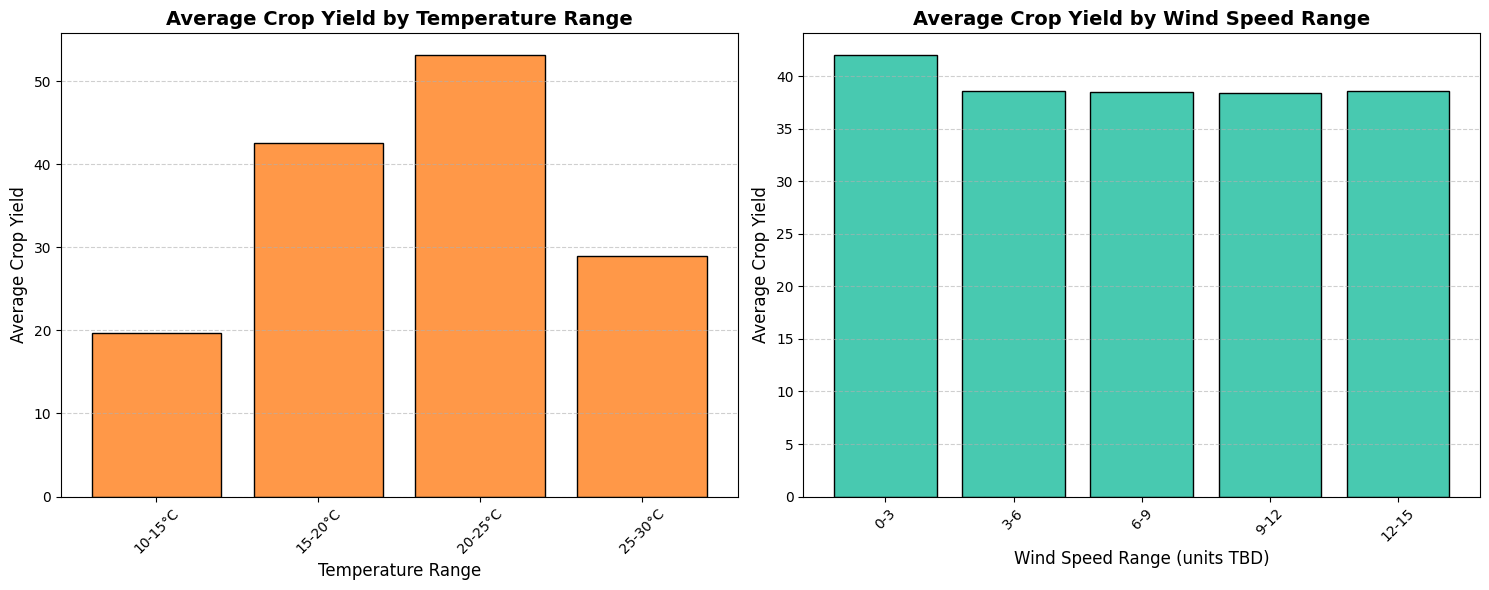


--- Summary Data: Yield by Temperature Range ---
| Temp_Group   |   Crop_Yield |
|:-------------|-------------:|
| 10-15°C      |      19.718  |
| 15-20°C      |      42.489  |
| 20-25°C      |      53.0892 |
| 25-30°C      |      28.9145 |

--- Summary Data: Yield by Wind Speed Range ---
| Wind_Group   |   Crop_Yield |
|:-------------|-------------:|
| 0-3          |      41.9744 |
| 3-6          |      38.5575 |
| 6-9          |      38.4939 |
| 9-12         |      38.4049 |
| 12-15        |      38.6235 |


In [5]:
import numpy as np
try:
    df = pd.read_excel("crop_yield_dataset.csv1.xlsm")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: 'crop_yield_dataset.csv' not found. Please upload the file.")
    df = pd.DataFrame() # Empty frame to prevent crash
if not df.empty:
    temp_min = df['Temperature'].min()
    temp_max = df['Temperature'].max()
    temp_bins = np.arange(round(temp_min, -1), round(temp_max, -1) + 10, 5)
    temp_bins = [5, 10, 15, 20, 25, 30]
    temp_labels = ['5-10°C', '10-15°C', '15-20°C', '20-25°C', '25-30°C']

    df['Temp_Group'] = pd.cut(
        df['Temperature'],
        bins=temp_bins,
        labels=temp_labels,
        right=False, # Includes the lower bound
        include_lowest=True
    )
    temp_yield_avg = df.groupby('Temp_Group', observed=True)['Crop_Yield'].mean().reset_index().dropna()
    wind_min = df['Wind_Speed'].min()
    wind_max = df['Wind_Speed'].max()
    # Define bins (e.g., increments of 3)
    wind_bins = [0, 3, 6, 9, 12, 15]
    wind_labels = ['0-3', '3-6', '6-9', '9-12', '12-15']
    df['Wind_Group'] = pd.cut(
        df['Wind_Speed'],
        bins=wind_bins,
        labels=wind_labels,
        right=False,
        include_lowest=True
    )
    wind_yield_avg = df.groupby('Wind_Group', observed=True)['Crop_Yield'].mean().reset_index().dropna()
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    plt.subplots_adjust(wspace=0.3) # Adjust space between plots
    axes[0].bar(
        temp_yield_avg['Temp_Group'],
        temp_yield_avg['Crop_Yield'],
        color='#FF9848', # Orange/Amber color
        edgecolor='black'
    )
    axes[0].set_title('Average Crop Yield by Temperature Range', fontsize=14, weight='bold')
    axes[0].set_xlabel('Temperature Range', fontsize=12)
    axes[0].set_ylabel('Average Crop Yield', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', linestyle='--', alpha=0.6)
    axes[1].bar(
        wind_yield_avg['Wind_Group'],
        wind_yield_avg['Crop_Yield'],
        color='#48C9B0', # Mint Green color
        edgecolor='black'
    )
    axes[1].set_title('Average Crop Yield by Wind Speed Range', fontsize=14, weight='bold')
    axes[1].set_xlabel('Wind Speed Range (units TBD)', fontsize=12)
    axes[1].set_ylabel('Average Crop Yield', fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    print("\n--- Summary Data: Yield by Temperature Range ---")
    print(temp_yield_avg.to_markdown(index=False))

    print("\n--- Summary Data: Yield by Wind Speed Range ---")
    print(wind_yield_avg.to_markdown(index=False))


Data loaded successfully.


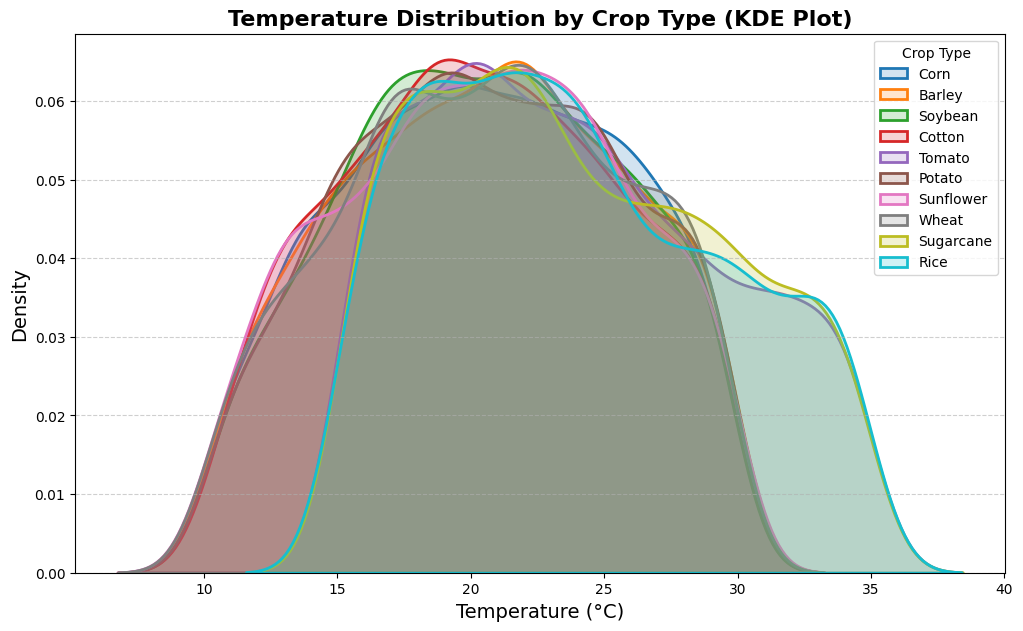

--- 1. Temperature Distribution Plot Generated ---


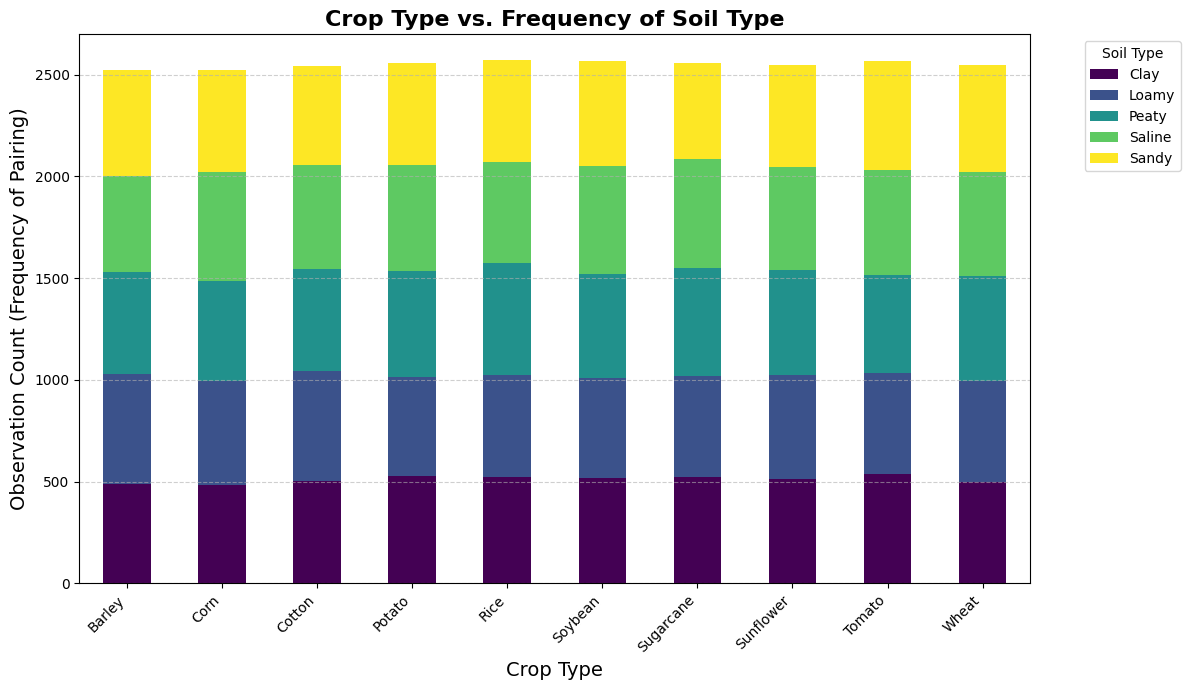


--- 2. Crop vs. Soil Type Bar Chart Generated ---

--- Summary Data: Crop Type vs. Soil Type Counts ---
| Crop_Type   |   Clay |   Loamy |   Peaty |   Saline |   Sandy |
|:------------|-------:|--------:|--------:|---------:|--------:|
| Barley      |    490 |     540 |     501 |      471 |     519 |
| Corn        |    482 |     514 |     491 |      532 |     505 |
| Cotton      |    504 |     538 |     505 |      510 |     484 |
| Potato      |    527 |     485 |     521 |      521 |     505 |
| Rice        |    525 |     500 |     550 |      495 |     499 |
| Soybean     |    516 |     494 |     512 |      531 |     512 |
| Sugarcane   |    525 |     496 |     530 |      532 |     473 |
| Sunflower   |    514 |     511 |     514 |      505 |     503 |
| Tomato      |    540 |     495 |     479 |      519 |     533 |
| Wheat       |    500 |     496 |     512 |      513 |     526 |


In [6]:
import seaborn as sns
try:
    df = pd.read_excel("crop_yield_dataset.csv1.xlsm")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: 'crop_yield_dataset.csv' not found. Please upload the file.")
    df = pd.DataFrame()
if not df.empty:
    plt.figure(figsize=(12, 7))
    crop_types = df['Crop_Type'].unique()
    for crop in crop_types:
        subset = df[df['Crop_Type'] == crop]
        if len(subset) > 1:
            sns.kdeplot(
                subset['Temperature'],
                label=crop,
                fill=True,
                alpha=0.2,
                linewidth=2
            )

    plt.title('Temperature Distribution by Crop Type (KDE Plot)', fontsize=16, weight='bold')
    plt.xlabel('Temperature (°C)', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend(title='Crop Type', loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()
    print("--- 1. Temperature Distribution Plot Generated ---")
    soil_counts = df.groupby(['Crop_Type', 'Soil_Type']).size().reset_index(name='Count')
    pivot_table = soil_counts.pivot(index='Crop_Type', columns='Soil_Type', values='Count').fillna(0)
    plt.figure(figsize=(12, 7))
    pivot_table.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
    plt.title('Crop Type vs. Frequency of Soil Type', fontsize=16, weight='bold')
    plt.xlabel('Crop Type', fontsize=14)
    plt.ylabel('Observation Count (Frequency of Pairing)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Soil Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    print("\n--- 2. Crop vs. Soil Type Bar Chart Generated ---")
    print("\n--- Summary Data: Crop Type vs. Soil Type Counts ---")
    print(pivot_table.to_markdown())


# New section

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.1 MB/s eta 0:00:00


In [7]:
#target encoding
import pandas as pd
import category_encoders as ce
import numpy as np
try:
    df = pd.read_excel("crop_yield_dataset.csv1.xlsm")
    print("Original data loaded successfully using pd.read_excel().")
except Exception as e:
    print(f"Error loading file: {e}. Please ensure the filename is correct.")
    exit()
TARGET = 'Crop_Yield'
CATEGORICAL_FEATURES = ['Crop_Type', 'Soil_Type', 'Soil_Quality']
df_encoded = df.drop('Date', axis=1)
X = df_encoded.drop(TARGET, axis=1)
y = df_encoded[TARGET]
encoder = ce.TargetEncoder(cols=CATEGORICAL_FEATURES)
X_encoded = encoder.fit_transform(X, y)
df_final = pd.concat([X_encoded, y], axis=1)
print("\n--- Columns Transformed by Target Encoding ---")
print(f"Original Categorical Columns: {CATEGORICAL_FEATURES}")
print(f"Encoded Columns: {[col for col in CATEGORICAL_FEATURES if col in df_final.columns]}")
print("\n--- First 5 Rows of the Target Encoded Dataframe ---")
print(df_final.head().to_markdown(index=False))
print("\n--- Data Types Check (Encoded Columns should be float64) ---")
print(df_final[CATEGORICAL_FEATURES].dtypes.to_frame().to_markdown())


Original data loaded successfully using pd.read_excel().

--- Columns Transformed by Target Encoding ---
Original Categorical Columns: ['Crop_Type', 'Soil_Type', 'Soil_Quality']
Encoded Columns: ['Crop_Type', 'Soil_Type', 'Soil_Quality']

--- First 5 Rows of the Target Encoded Dataframe ---
|   Crop_Type |   Soil_Type |   Soil_pH |   Temperature |   Humidity |   Wind_Speed |    N |   P |    K |   Soil_Quality |   Crop_Yield |
|------------:|------------:|----------:|--------------:|-----------:|-------------:|-----:|----:|-----:|---------------:|-------------:|
|     40.9918 |     52.5114 |      6.5  |       20.0526 |    79.9474 |      8.59158 | 84   |  66 | 50   |        56.5022 |     104.871  |
|     37.0167 |     33.4075 |      6.75 |       19.7518 |    80      |      2.68268 | 50   |  40 | 30   |        31.9651 |      58.9398 |
|     36.9216 |     31.3276 |      5.5  |       16.1104 |    80      |      7.69607 | 49.5 |  45 | 38.5 |        30.1708 |      32.9704 |
|     41.9796 |   

In [8]:
#one-hot encoding
CATEGORICAL_FEATURES = ['Crop_Type', 'Soil_Type', 'Soil_Quality']
TARGET = 'Crop_Yield'
df_ready = df.drop('Date', axis=1)
X = df_ready.drop(TARGET, axis=1)
y = df_ready[TARGET]
encoder = ce.OneHotEncoder(cols=CATEGORICAL_FEATURES, use_cat_names=True)
X_encoded = encoder.fit_transform(X)
df_final = pd.concat([X_encoded, y], axis=1)
new_cols = [col for col in df_final.columns if any(cat_col in col for cat_col in CATEGORICAL_FEATURES)]
print(f"\n--- {len(new_cols)} New Columns Created by One-Hot Encoding ---")
print(new_cols)
print("\n--- First 5 Rows of the One-Hot Encoded Dataframe ---")
print(df_final.iloc[:, :10].head().to_markdown(index=False))
print(f"\n--- Total Number of Columns After Encoding: {df_final.shape[1]} ---")


--- 60 New Columns Created by One-Hot Encoding ---
['Crop_Type_Corn', 'Crop_Type_Barley', 'Crop_Type_Soybean', 'Crop_Type_Cotton', 'Crop_Type_Tomato', 'Crop_Type_Potato', 'Crop_Type_Sunflower', 'Crop_Type_Wheat', 'Crop_Type_Sugarcane', 'Crop_Type_Rice', 'Soil_Type_Loamy', 'Soil_Type_Sandy', 'Soil_Type_Peaty', 'Soil_Type_Clay', 'Soil_Type_Saline', 'Soil_Quality_66.6666666666666', 'Soil_Quality_35.0', 'Soil_Quality_22.1666666666666', 'Soil_Quality_39.375', 'Soil_Quality_42.2916666666666', 'Soil_Quality_22.8333333333333', 'Soil_Quality_63.6666666666666', 'Soil_Quality_48.7083333333333', 'Soil_Quality_13.75', 'Soil_Quality_67.6666666666666', 'Soil_Quality_13.9166666666666', 'Soil_Quality_14.5833333333333', 'Soil_Quality_25.0833333333333', 'Soil_Quality_60.0', 'Soil_Quality_43.1666666666666', 'Soil_Quality_25.3333333333333', 'Soil_Quality_58.0', 'Soil_Quality_35.5833333333333', 'Soil_Quality_37.0416666666666', 'Soil_Quality_60.6666666666666', 'Soil_Quality_39.0833333333333', 'Soil_Quality_

In [9]:
#leave one out encoding
TARGET = 'Crop_Yield'
CATEGORICAL_FEATURES = ['Crop_Type', 'Soil_Type', 'Soil_Quality']
df_ready = df.drop('Date', axis=1)
X = df_ready.drop(TARGET, axis=1)
y = df_ready[TARGET]
encoder = ce.LeaveOneOutEncoder(cols=CATEGORICAL_FEATURES)
X_encoded = encoder.fit_transform(X, y)
df_final = pd.concat([X_encoded, y], axis=1)

print("\n--- Columns Transformed by Leave One Out Encoding ---")
print(f"Original Categorical Columns: {CATEGORICAL_FEATURES}")
print(f"Encoded Columns: {[col for col in CATEGORICAL_FEATURES if col in df_final.columns]}")

print("\n--- First 5 Rows of the Leave One Out Encoded Dataframe ---")
print(df_final.head().to_markdown(index=False))

print("\n--- Data Types Check (Encoded Columns should be float64) ---")
print(df_final[CATEGORICAL_FEATURES].dtypes.to_frame().to_markdown())



--- Columns Transformed by Leave One Out Encoding ---
Original Categorical Columns: ['Crop_Type', 'Soil_Type', 'Soil_Quality']
Encoded Columns: ['Crop_Type', 'Soil_Type', 'Soil_Quality']

--- First 5 Rows of the Leave One Out Encoded Dataframe ---
|   Crop_Type |   Soil_Type |   Soil_pH |   Temperature |   Humidity |   Wind_Speed |    N |   P |    K |   Soil_Quality |   Crop_Yield |
|------------:|------------:|----------:|--------------:|-----------:|-------------:|-----:|----:|-----:|---------------:|-------------:|
|     40.9664 |     52.501  |      6.5  |       20.0526 |    79.9474 |      8.59158 | 84   |  66 | 50   |        56.4079 |     104.871  |
|     37.008  |     33.4025 |      6.75 |       19.7518 |    80      |      2.68268 | 50   |  40 | 30   |        31.913  |      58.9398 |
|     36.9231 |     31.3273 |      5.5  |       16.1104 |    80      |      7.69607 | 49.5 |  45 | 38.5 |        30.1653 |      32.9704 |
|     41.9846 |     33.4083 |      6.75 |       14.8267 |    

In [10]:
#label encoding
TARGET = 'Crop_Yield'
CATEGORICAL_FEATURES = ['Crop_Type', 'Soil_Type', 'Soil_Quality']
df_ready = df.drop('Date', axis=1)
X = df_ready.drop(TARGET, axis=1)
y = df_ready[TARGET]
encoder = ce.OrdinalEncoder(cols=CATEGORICAL_FEATURES)
X_encoded = encoder.fit_transform(X)
df_final = pd.concat([X_encoded, y], axis=1)

print("\n--- Columns Transformed by Label (Ordinal) Encoding ---")
print(f"Original Categorical Columns: {CATEGORICAL_FEATURES}")
print(f"Encoded Columns: {[col for col in CATEGORICAL_FEATURES if col in df_final.columns]}")

print("\n--- First 5 Rows of the Label Encoded Dataframe ---")
print(df_final.head().to_markdown(index=False))

print("\n--- Data Types Check (Encoded Columns should be int64 or float64) ---")
print(df_final[CATEGORICAL_FEATURES].dtypes.to_frame().to_markdown())



--- Columns Transformed by Label (Ordinal) Encoding ---
Original Categorical Columns: ['Crop_Type', 'Soil_Type', 'Soil_Quality']
Encoded Columns: ['Crop_Type', 'Soil_Type', 'Soil_Quality']

--- First 5 Rows of the Label Encoded Dataframe ---
|   Crop_Type |   Soil_Type |   Soil_pH |   Temperature |   Humidity |   Wind_Speed |    N |   P |    K |   Soil_Quality |   Crop_Yield |
|------------:|------------:|----------:|--------------:|-----------:|-------------:|-----:|----:|-----:|---------------:|-------------:|
|           1 |           1 |      6.5  |       20.0526 |    79.9474 |      8.59158 | 84   |  66 | 50   |              1 |     104.871  |
|           2 |           2 |      6.75 |       19.7518 |    80      |      2.68268 | 50   |  40 | 30   |              2 |      58.9398 |
|           3 |           3 |      5.5  |       16.1104 |    80      |      7.69607 | 49.5 |  45 | 38.5 |              3 |      32.9704 |
|           4 |           2 |      6.75 |       14.8267 |    80    

In [11]:
#standard scaling
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
TARGET = 'Crop_Yield'
df_proc = df.drop('Date', axis=1)
X = df_proc.drop(TARGET, axis=1)
y = df_proc[TARGET]
CATEGORICAL_FEATURES = ['Crop_Type', 'Soil_Type', 'Soil_Quality']
NUMERICAL_FEATURES = X.drop(columns=CATEGORICAL_FEATURES).columns.tolist()
print(f"Categorical Features (Untouched): {CATEGORICAL_FEATURES}")
print(f"Numerical Features to Scale: {NUMERICAL_FEATURES}")
numerical_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, NUMERICAL_FEATURES)
    ],
    remainder='passthrough'
)
X_scaled_array = preprocessor.fit_transform(X)
feature_names_out = preprocessor.get_feature_names_out()
clean_feature_names = [name.split('__')[-1] for name in feature_names_out]

df_scaled = pd.DataFrame(X_scaled_array, columns=clean_feature_names)
y_reset = y.reset_index(drop=True)
df_final = pd.concat([df_scaled, y_reset], axis=1)
print("\n--- Final Preprocessed Dataframe Structure ---")
print(f"Total Columns: {len(df_final.columns)}")
print("\n--- First 5 Rows of the Partially Preprocessed Dataframe ---")
with pd.option_context('display.float_format', '{:.4f}'.format):
    print(df_final.head().to_markdown(index=False))
print("\n--- Data Types Check (Categorical should still be 'object') ---")
print(df_final.dtypes.to_frame().to_markdown())

Categorical Features (Untouched): ['Crop_Type', 'Soil_Type', 'Soil_Quality']
Numerical Features to Scale: ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K']

--- Final Preprocessed Dataframe Structure ---
Total Columns: 11

--- First 5 Rows of the Partially Preprocessed Dataframe ---
|   Soil_pH |   Temperature |   Humidity |   Wind_Speed |         N |         P |         K | Crop_Type   | Soil_Type   |   Soil_Quality |   Crop_Yield |
|----------:|--------------:|-----------:|-------------:|----------:|----------:|----------:|:------------|:------------|---------------:|-------------:|
| -0.122964 |     -0.260859 |   0.802313 |    -0.469878 |  1.64942  |  1.47346  |  0.936043 | Corn        | Loamy       |        66.6667 |     104.871  |
|  0.182886 |     -0.315545 |   0.816279 |    -2.43775  | -1.46817  | -1.47584  | -1.40907  | Barley      | Sandy       |        35      |      58.9398 |
| -1.34636  |     -0.977727 |   0.816279 |    -0.768113 | -1.51402  | -0.908669 | 

In [12]:
#min max scaling
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler # <-- Using MinMaxScaler
from sklearn.compose import ColumnTransformer

TARGET = 'Crop_Yield'
df_proc = df.drop('Date', axis=1)
X = df_proc.drop(TARGET, axis=1)
y = df_proc[TARGET]
CATEGORICAL_FEATURES = ['Crop_Type', 'Soil_Type', 'Soil_Quality']
NUMERICAL_FEATURES = X.drop(columns=CATEGORICAL_FEATURES).columns.tolist()

print(f"Categorical Features (Untouched): {CATEGORICAL_FEATURES}")
print(f"Numerical Features to Scale: {NUMERICAL_FEATURES}")
numerical_transformer = MinMaxScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, NUMERICAL_FEATURES)
    ],
    remainder='passthrough' # <-- This is key: keeps categorical columns as they are
)
X_scaled_array = preprocessor.fit_transform(X)
feature_names_out = preprocessor.get_feature_names_out()
clean_feature_names = [name.split('__')[-1] for name in feature_names_out]

df_scaled = pd.DataFrame(X_scaled_array, columns=clean_feature_names)
y_reset = y.reset_index(drop=True)
df_final = pd.concat([df_scaled, y_reset], axis=1)

print("\n--- Final Partially Preprocessed Dataframe Structure ---")
print(f"Total Columns: {len(df_final.columns)}")

print("\n--- First 5 Rows of the Dataframe ---")
with pd.option_context('display.float_format', '{:.4f}'.format):
    print(df_final.head().to_markdown(index=False))

print("\n--- Data Types Check (Categorical should still be 'object') ---")
print(df_final.dtypes.to_frame().to_markdown())

Categorical Features (Untouched): ['Crop_Type', 'Soil_Type', 'Soil_Quality']
Numerical Features to Scale: ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K']

--- Final Partially Preprocessed Dataframe Structure ---
Total Columns: 11

--- First 5 Rows of the Dataframe ---
|   Soil_pH |   Temperature |   Humidity |   Wind_Speed |         N |        P |         K | Crop_Type   | Soil_Type   |   Soil_Quality |   Crop_Yield |
|----------:|--------------:|-----------:|-------------:|----------:|---------:|----------:|:------------|:------------|---------------:|-------------:|
|       0.4 |      0.40216  |   0.996494 |     0.4953   | 0.847826  | 0.833333 | 0.69697   | Corn        | Loamy       |        66.6667 |     104.871  |
|       0.5 |      0.390129 |   1        |     0.251013 | 0.108696  | 0.111111 | 0.0909091 | Barley      | Sandy       |        35      |      58.9398 |
|       0   |      0.244445 |   1        |     0.458278 | 0.0978261 | 0.25     | 0.348485  | Soybea

In [13]:
#leave one out encoding standard scaling
import pandas as pd
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

TARGET = 'Crop_Yield'
df_proc = df.drop('Date', axis=1)
X = df_proc.drop(TARGET, axis=1)
y = df_proc[TARGET]
CATEGORICAL_FEATURES = ['Crop_Type', 'Soil_Type', 'Soil_Quality']
NUMERICAL_FEATURES = X.drop(columns=CATEGORICAL_FEATURES).columns.tolist()

print(f"Categorical Features to Encode: {CATEGORICAL_FEATURES}")
print(f"Numerical Features to Scale: {NUMERICAL_FEATURES}")
loo_encoder = ce.LeaveOneOutEncoder(cols=CATEGORICAL_FEATURES, sigma=0.0, handle_missing='value', handle_unknown='value')
X_cat_encoded = loo_encoder.fit_transform(X[CATEGORICAL_FEATURES], y)
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X[NUMERICAL_FEATURES]), columns=NUMERICAL_FEATURES)
X_encoded = pd.concat([X_cat_encoded.reset_index(drop=True), X_num_scaled.reset_index(drop=True)], axis=1)
y_reset = y.reset_index(drop=True)
df_final = pd.concat([X_encoded, y_reset], axis=1)

print("\n--- Final Preprocessed Dataframe Structure ---")
print(f"Total Columns: {len(df_final.columns)}")

print("\n--- First 5 Rows of the Fully Preprocessed Dataframe ---")
with pd.option_context('display.float_format', '{:.4f}'.format):
   print(df_final.head().to_markdown(index=False))


print("\n--- Data Types Check (All Features should be numeric) ---")
print(df_final.dtypes.to_frame().to_markdown())


Categorical Features to Encode: ['Crop_Type', 'Soil_Type', 'Soil_Quality']
Numerical Features to Scale: ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K']

--- Final Preprocessed Dataframe Structure ---
Total Columns: 11

--- First 5 Rows of the Fully Preprocessed Dataframe ---
|   Crop_Type |   Soil_Type |   Soil_Quality |   Soil_pH |   Temperature |   Humidity |   Wind_Speed |         N |         P |         K |   Crop_Yield |
|------------:|------------:|---------------:|----------:|--------------:|-----------:|-------------:|----------:|----------:|----------:|-------------:|
|     40.9664 |     52.501  |        56.4079 | -0.122964 |     -0.260859 |   0.802313 |    -0.469878 |  1.64942  |  1.47346  |  0.936043 |     104.871  |
|     37.008  |     33.4025 |        31.913  |  0.182886 |     -0.315545 |   0.816279 |    -2.43775  | -1.46817  | -1.47584  | -1.40907  |      58.9398 |
|     36.9231 |     31.3273 |        30.1653 | -1.34636  |     -0.977727 |   0.816279 | 

In [14]:
#leave one out encoder with min max scaling
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce

TARGET = 'Crop_Yield'
df_proc = df.drop('Date', axis=1)
X = df_proc.drop(TARGET, axis=1)
y = df_proc[TARGET]

CATEGORICAL_FEATURES = ['Crop_Type', 'Soil_Type', 'Soil_Quality']
NUMERICAL_FEATURES = X.drop(columns=CATEGORICAL_FEATURES).columns.tolist()

print(f"Categorical Features to Encode: {CATEGORICAL_FEATURES}")
print(f"Numerical Features to Scale: {NUMERICAL_FEATURES}")
looe_encoder = ce.LeaveOneOutEncoder(cols=CATEGORICAL_FEATURES, sigma=0.0, handle_missing='value', handle_unknown='value')
X_cat_encoded = looe_encoder.fit_transform(X[CATEGORICAL_FEATURES], y)
scaler = MinMaxScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X[NUMERICAL_FEATURES]), columns=NUMERICAL_FEATURES)
X_encoded = pd.concat([X_cat_encoded.reset_index(drop=True), X_num_scaled.reset_index(drop=True)], axis=1)
y_reset = y.reset_index(drop=True)
df_final = pd.concat([X_encoded, y_reset], axis=1)

print("\n--- Final Preprocessed Dataframe Structure ---")
print(f"Total Columns: {len(df_final.columns)}")

print("\n--- First 5 Rows of the Fully Preprocessed Dataframe ---")
with pd.option_context('display.float_format', '{:.4f}'.format, 'display.max_columns', None):
    print(df_final.head().to_markdown(index=False))

print("\n--- Data Types Check (All Features should be numeric) ---")
print(df_final.dtypes.to_frame().to_markdown())


Categorical Features to Encode: ['Crop_Type', 'Soil_Type', 'Soil_Quality']
Numerical Features to Scale: ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K']

--- Final Preprocessed Dataframe Structure ---
Total Columns: 11

--- First 5 Rows of the Fully Preprocessed Dataframe ---
|   Crop_Type |   Soil_Type |   Soil_Quality |   Soil_pH |   Temperature |   Humidity |   Wind_Speed |         N |        P |         K |   Crop_Yield |
|------------:|------------:|---------------:|----------:|--------------:|-----------:|-------------:|----------:|---------:|----------:|-------------:|
|     40.9664 |     52.501  |        56.4079 |       0.4 |      0.40216  |   0.996494 |     0.4953   | 0.847826  | 0.833333 | 0.69697   |     104.871  |
|     37.008  |     33.4025 |        31.913  |       0.5 |      0.390129 |   1        |     0.251013 | 0.108696  | 0.111111 | 0.0909091 |      58.9398 |
|     36.9231 |     31.3273 |        30.1653 |       0   |      0.244445 |   1        |     

In [15]:
#one hot encoding with min max scaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce
TARGET = 'Crop_Yield'
df_proc = df.drop('Date', axis=1)
X = df_proc.drop(TARGET, axis=1)
y = df_proc[TARGET]
CATEGORICAL_FEATURES = ['Crop_Type', 'Soil_Type', 'Soil_Quality']
NUMERICAL_FEATURES = X.drop(columns=CATEGORICAL_FEATURES).columns.tolist()
print(f"Categorical Features to Encode: {CATEGORICAL_FEATURES}")
print(f"Numerical Features to Scale: {NUMERICAL_FEATURES}")
onehot_encoder = ce.OneHotEncoder(cols=CATEGORICAL_FEATURES, use_cat_names=True)
X_cat_encoded = onehot_encoder.fit_transform(X)
scaler = MinMaxScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X[NUMERICAL_FEATURES]), columns=NUMERICAL_FEATURES)
X_cat_encoded = X_cat_encoded.drop(columns=NUMERICAL_FEATURES)
X_encoded = pd.concat([X_cat_encoded.reset_index(drop=True), X_num_scaled.reset_index(drop=True)], axis=1)
y_reset = y.reset_index(drop=True)
df_final = pd.concat([X_encoded, y_reset], axis=1)

print("\n--- Final Preprocessed Dataframe Structure ---")
print(f"Total Columns: {len(df_final.columns)}")

print("\n--- First 5 Rows of the Fully Preprocessed Dataframe ---")
with pd.option_context('display.float_format', '{:.4f}'.format, 'display.max_columns', None):
    print(df_final.head().to_markdown(index=False))

print("\n--- Data Types Check (All Features should be numeric) ---")
print(df_final.dtypes.to_frame().to_markdown())


Categorical Features to Encode: ['Crop_Type', 'Soil_Type', 'Soil_Quality']
Numerical Features to Scale: ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K']

--- Final Preprocessed Dataframe Structure ---
Total Columns: 68

--- First 5 Rows of the Fully Preprocessed Dataframe ---
|   Crop_Type_Corn |   Crop_Type_Barley |   Crop_Type_Soybean |   Crop_Type_Cotton |   Crop_Type_Tomato |   Crop_Type_Potato |   Crop_Type_Sunflower |   Crop_Type_Wheat |   Crop_Type_Sugarcane |   Crop_Type_Rice |   Soil_Type_Loamy |   Soil_Type_Sandy |   Soil_Type_Peaty |   Soil_Type_Clay |   Soil_Type_Saline |   Soil_Quality_66.6666666666666 |   Soil_Quality_35.0 |   Soil_Quality_22.1666666666666 |   Soil_Quality_39.375 |   Soil_Quality_42.2916666666666 |   Soil_Quality_22.8333333333333 |   Soil_Quality_63.6666666666666 |   Soil_Quality_48.7083333333333 |   Soil_Quality_13.75 |   Soil_Quality_67.6666666666666 |   Soil_Quality_13.9166666666666 |   Soil_Quality_14.5833333333333 |   Soil_Quality_

In [16]:
#one hot encoding standard scaling
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # <-- Standard Scaling for numerical data
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # <-- Standard Scaling for numerical data
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
try:
    df = pd.read_excel("crop_yield_dataset.csv1.xlsm")
    print("Original data loaded successfully.")
except FileNotFoundError:
    print("Error: 'crop_yield_dataset.csv' not found. Please upload the file.")
    exit()
TARGET = 'Crop_Yield'
df_proc = df.drop('Date', axis=1)
X = df_proc.drop(TARGET, axis=1)
y = df_proc[TARGET]
CATEGORICAL_FEATURES = ['Crop_Type', 'Soil_Type', 'Soil_Quality']
NUMERICAL_FEATURES = X.drop(columns=CATEGORICAL_FEATURES).columns.tolist()

print(f"Categorical Features to Encode: {CATEGORICAL_FEATURES}")
print(f"Numerical Features to Scale: {NUMERICAL_FEATURES}")
categorical_transformer = ce.OneHotEncoder(cols=CATEGORICAL_FEATURES, use_cat_names=True)
numerical_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, CATEGORICAL_FEATURES),
        ('num', numerical_transformer, NUMERICAL_FEATURES)
    ],
    remainder='passthrough'
)
X_encoded_array = preprocessor.fit_transform(X)
feature_names_out = preprocessor.get_feature_names_out()
clean_feature_names = [name.split('__')[-1] for name in feature_names_out]

df_encoded = pd.DataFrame(X_encoded_array, columns=clean_feature_names)
y_reset = y.reset_index(drop=True)
df_final = pd.concat([df_encoded, y_reset], axis=1)

print("\n--- Final Preprocessed Dataframe Structure ---")
print(f"Total Columns: {len(df_final.columns)}")

print("\n--- First 5 Rows of the Fully Preprocessed Dataframe ---")
with pd.option_context('display.float_format', '{:.4f}'.format, 'display.max_columns', None):
    print(df_final.head().to_markdown(index=False))

print("\n--- Data Types Check (All Features should be numeric) ---")
print(df_final.dtypes.to_frame().to_markdown())


Original data loaded successfully.
Categorical Features to Encode: ['Crop_Type', 'Soil_Type', 'Soil_Quality']
Numerical Features to Scale: ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K']

--- Final Preprocessed Dataframe Structure ---
Total Columns: 68

--- First 5 Rows of the Fully Preprocessed Dataframe ---
|   Crop_Type_Corn |   Crop_Type_Barley |   Crop_Type_Soybean |   Crop_Type_Cotton |   Crop_Type_Tomato |   Crop_Type_Potato |   Crop_Type_Sunflower |   Crop_Type_Wheat |   Crop_Type_Sugarcane |   Crop_Type_Rice |   Soil_Type_Loamy |   Soil_Type_Sandy |   Soil_Type_Peaty |   Soil_Type_Clay |   Soil_Type_Saline |   Soil_Quality_66.6666666666666 |   Soil_Quality_35.0 |   Soil_Quality_22.1666666666666 |   Soil_Quality_39.375 |   Soil_Quality_42.2916666666666 |   Soil_Quality_22.8333333333333 |   Soil_Quality_63.6666666666666 |   Soil_Quality_48.7083333333333 |   Soil_Quality_13.75 |   Soil_Quality_67.6666666666666 |   Soil_Quality_13.9166666666666 |   Soil_Quality